In [89]:

# Open and observe the data
import pandas as pd
daf = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/nga asthma exl.xlsx')
daf.head()

#checking our for column names

daf.columns

Index(['SN', 'State', 'LGA', 'Ward', 'HHID', 'ColdorFlu', 'Sneezing', 'Runny',
       'BlockedNose', 'ItchyWateryEyes', 'Triggers', 'Animals', 'Allergic',
       'TestedforAllergy', 'PreviousMedicalDiagnosisofAllergies',
       'FamilySufferfromAsthma', 'SFARSCORE', 'SCREENEDFORALLERGICRHINITIS',
       'ASTHMASCREENINGQUESTIONNAIRE', 'YouDiagnosedWithAsthma',
       'AsthmaSymptoms12months', 'AsthmaAttack12months',
       'AsthmaMedication12months', 'Ventolin12months', 'POSSIBLEASTHMA',
       'PROBABLEASTHMA', 'CURRENTASTHMA', 'Gender', 'Ageinyears', 'AGEGROUP',
       'AGECATEGORY', 'PRIMARYCOOKINGFUEL', 'SECONDARYCOOKINGFUEL',
       'Locationkitchen', 'MaritalStatus', 'LEVELOFEDUCATION',
       'employmentstatus', 'householdincome', 'SMOKINGSTATUS',
       'YEARSOFSMOKING', 'CIGARETTESPERDAY', 'WEIGHT', 'HEIGHT', 'BMI',
       'Waistcircumference', 'WeighingVariable', 'BMIGrp', 'NewAgeGrp',
       'filter_$'],
      dtype='object')

# **DATA CLEANING**

In [90]:
# checking for null values

daf.isna().sum()

# checking for columns with null vlues greater than zero

missing_values = daf.isna().sum()
missing_values[missing_values > 0]

,0
ColdorFlu,20063
ItchyWateryEyes,5637
Triggers,5662
Animals,5637
TestedforAllergy,19933
ASTHMASCREENINGQUESTIONNAIRE,20063
PROBABLEASTHMA,1
CURRENTASTHMA,1
SECONDARYCOOKINGFUEL,35
SMOKINGSTATUS,2


In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# checking for columns with null values greater exactly zero

missing_values = daf.isna().sum()
missing_values[missing_values == 0]

,0
SN,0
State,0
LGA,0
Ward,0
HHID,0
Sneezing,0
Runny,0
BlockedNose,0
Allergic,0
PreviousMedicalDiagnosisofAllergies,0


In [93]:
# make a copy of data for further EDA

df = daf.copy()


In [94]:
# Calculate percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Sort from highest to lowest missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display only columns with missing values
missing_cols = missing_percentage[missing_percentage > 0]

missing_cols

,0
ColdorFlu,100.000000
ASTHMASCREENINGQUESTIONNAIRE,100.000000
TestedforAllergy,99.352041
Triggers,28.221104
ItchyWateryEyes,28.096496
Animals,28.096496
SECONDARYCOOKINGFUEL,0.174450
SMOKINGSTATUS,0.009969
PROBABLEASTHMA,0.004984
CURRENTASTHMA,0.004984


In [95]:
df['PROBABLEASTHMA'].isna().sum()
df['PROBABLEASTHMA'].value_counts()
df.columns

Index(['SN', 'State', 'LGA', 'Ward', 'HHID', 'ColdorFlu', 'Sneezing', 'Runny',
       'BlockedNose', 'ItchyWateryEyes', 'Triggers', 'Animals', 'Allergic',
       'TestedforAllergy', 'PreviousMedicalDiagnosisofAllergies',
       'FamilySufferfromAsthma', 'SFARSCORE', 'SCREENEDFORALLERGICRHINITIS',
       'ASTHMASCREENINGQUESTIONNAIRE', 'YouDiagnosedWithAsthma',
       'AsthmaSymptoms12months', 'AsthmaAttack12months',
       'AsthmaMedication12months', 'Ventolin12months', 'POSSIBLEASTHMA',
       'PROBABLEASTHMA', 'CURRENTASTHMA', 'Gender', 'Ageinyears', 'AGEGROUP',
       'AGECATEGORY', 'PRIMARYCOOKINGFUEL', 'SECONDARYCOOKINGFUEL',
       'Locationkitchen', 'MaritalStatus', 'LEVELOFEDUCATION',
       'employmentstatus', 'householdincome', 'SMOKINGSTATUS',
       'YEARSOFSMOKING', 'CIGARETTESPERDAY', 'WEIGHT', 'HEIGHT', 'BMI',
       'Waistcircumference', 'WeighingVariable', 'BMIGrp', 'NewAgeGrp',
       'filter_$'],
      dtype='object')

In [96]:
df.drop(columns=['SN', 'ASTHMASCREENINGQUESTIONNAIRE', 'State', 'LGA', 'Ward', 'SFARSCORE', 'TestedforAllergy', 'Animals', 'Triggers', 'ItchyWateryEyes', 'Waistcircumference', 'WeighingVariable', 'BMI', 'ColdorFlu', 'CIGARETTESPERDAY', 'CURRENTASTHMA', 'FamilySufferfromAsthma', 'SFARSCORE', 'SCREENEDFORALLERGICRHINITIS'], axis=1, inplace=True)

In [97]:
df.head()
df.shape
df.columns
df.isna().sum()

,0
HHID,0
Sneezing,0
Runny,0
BlockedNose,0
Allergic,0
PreviousMedicalDiagnosisofAllergies,0
YouDiagnosedWithAsthma,0
AsthmaSymptoms12months,0
AsthmaAttack12months,0
AsthmaMedication12months,0


In [98]:
df = df[df['PROBABLEASTHMA'].notnull()]
df = df[df['SMOKINGSTATUS'].notnull()]
df.isna().sum()

,0
HHID,0
Sneezing,0
Runny,0
BlockedNose,0
Allergic,0
PreviousMedicalDiagnosisofAllergies,0
YouDiagnosedWithAsthma,0
AsthmaSymptoms12months,0
AsthmaAttack12months,0
AsthmaMedication12months,0


In [99]:
df.head()

,HHID,Sneezing,Runny,BlockedNose,Allergic,PreviousMedicalDiagnosisofAllergies,YouDiagnosedWithAsthma,AsthmaSymptoms12months,AsthmaAttack12months,AsthmaMedication12months,...,LEVELOFEDUCATION,employmentstatus,householdincome,SMOKINGSTATUS,YEARSOFSMOKING,WEIGHT,HEIGHT,BMIGrp,NewAgeGrp,filter_$
0,2791,1,1,0,0,0,0,0,0,0,...,4,4,4,0.0,0,39,147,Underweight,6 - 17,0
1,2791,1,1,0,0,0,0,0,0,0,...,4,4,4,0.0,0,56,169,Normal,6 - 17,0
2,2792,1,0,0,0,0,0,0,0,0,...,5,3,5,0.0,0,74,185,Normal,>=45,1
3,2792,1,0,0,2,0,0,0,0,0,...,4,4,5,0.0,0,40,153,Underweight,6 - 17,0
4,2792,1,1,0,0,0,0,0,0,0,...,4,4,5,0.0,0,62,172,Normal,6 - 17,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20060 entries, 0 to 20062
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HHID                                 20060 non-null  int64  
 1   Sneezing                             20060 non-null  int64  
 2   Runny                                20060 non-null  int64  
 3   BlockedNose                          20060 non-null  int64  
 4   Allergic                             20060 non-null  int64  
 5   PreviousMedicalDiagnosisofAllergies  20060 non-null  int64  
 6   YouDiagnosedWithAsthma               20060 non-null  object 
 7   AsthmaSymptoms12months               20060 non-null  object 
 8   AsthmaAttack12months                 20060 non-null  object 
 9   AsthmaMedication12months             20060 non-null  object 
 10  Ventolin12months                     20060 non-null  object 
 11  POSSIBLEASTHMA                   

In [101]:
# Value counts for 'POSSIBLEASTHMA'
possible_asthma_counts = df['POSSIBLEASTHMA'].value_counts()
print("Value counts for POSSIBLEASTHMA:\n", possible_asthma_counts)

# Value counts for 'PROBABLEASTHMA'
probable_asthma_counts = df['PROBABLEASTHMA'].value_counts()
print("\nValue counts for PROBABLEASTHMA:\n", probable_asthma_counts)


Value counts for POSSIBLEASTHMA:
 POSSIBLEASTHMA
0    17867
1     2193
Name: count, dtype: int64

Value counts for PROBABLEASTHMA:
 PROBABLEASTHMA
0.0    18814
1.0     1246
Name: count, dtype: int64


In [102]:
df.columns

Index(['HHID', 'Sneezing', 'Runny', 'BlockedNose', 'Allergic',
       'PreviousMedicalDiagnosisofAllergies', 'YouDiagnosedWithAsthma',
       'AsthmaSymptoms12months', 'AsthmaAttack12months',
       'AsthmaMedication12months', 'Ventolin12months', 'POSSIBLEASTHMA',
       'PROBABLEASTHMA', 'Gender', 'Ageinyears', 'AGEGROUP', 'AGECATEGORY',
       'PRIMARYCOOKINGFUEL', 'SECONDARYCOOKINGFUEL', 'Locationkitchen',
       'MaritalStatus', 'LEVELOFEDUCATION', 'employmentstatus',
       'householdincome', 'SMOKINGSTATUS', 'YEARSOFSMOKING', 'WEIGHT',
       'HEIGHT', 'BMIGrp', 'NewAgeGrp', 'filter_$'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20060 entries, 0 to 20062
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HHID                                 20060 non-null  int64  
 1   Sneezing                             20060 non-null  int64  
 2   Runny                                20060 non-null  int64  
 3   BlockedNose                          20060 non-null  int64  
 4   Allergic                             20060 non-null  int64  
 5   PreviousMedicalDiagnosisofAllergies  20060 non-null  int64  
 6   YouDiagnosedWithAsthma               20060 non-null  object 
 7   AsthmaSymptoms12months               20060 non-null  object 
 8   AsthmaAttack12months                 20060 non-null  object 
 9   AsthmaMedication12months             20060 non-null  object 
 10  Ventolin12months                     20060 non-null  object 
 11  POSSIBLEASTHMA                   

# **ANALYSIS**

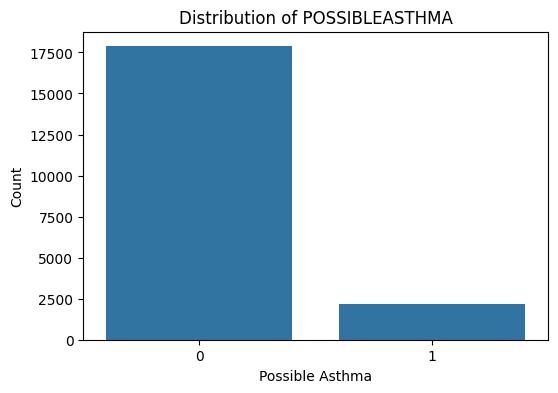

In [104]:
# Visualize class distribution of the target variable

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution of 'POSSIBLEASTHMA'
plt.figure(figsize=(6, 4))
sns.countplot(x='POSSIBLEASTHMA', data=df)
plt.title('Distribution of POSSIBLEASTHMA')
plt.xlabel('Possible Asthma')
plt.ylabel('Count')
plt.show()


In [106]:
# Import necessary library for Grid Search hyperparameter tuning
from sklearn.model_selection import GridSearchCV # Changed from RandomizedSearchCV

import numpy as np
import matplotlib.pyplot as plt

# Data processing and modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [107]:
# Evaluation metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    balanced_accuracy_score,
    matthews_corrcoef,
    precision_recall_curve,
    average_precision_score,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay
)

In [108]:
# --- Configuration ---
FEATURE_COLUMNS = [
    'Sneezing', 'Runny', 'BlockedNose', 'Allergic',
    'PreviousMedicalDiagnosisofAllergies',
    'Gender', 'Ageinyears', 'SMOKINGSTATUS',
    'YEARSOFSMOKING', 'BMIGrp','NewAgeGrp','Ventolin12months'
]

In [109]:
df[FEATURE_COLUMNS].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20060 entries, 0 to 20062
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sneezing                             20060 non-null  int64  
 1   Runny                                20060 non-null  int64  
 2   BlockedNose                          20060 non-null  int64  
 3   Allergic                             20060 non-null  int64  
 4   PreviousMedicalDiagnosisofAllergies  20060 non-null  int64  
 5   Gender                               20060 non-null  int64  
 6   Ageinyears                           20060 non-null  int64  
 7   SMOKINGSTATUS                        20060 non-null  float64
 8   YEARSOFSMOKING                       20060 non-null  int64  
 9   BMIGrp                               20060 non-null  object 
 10  NewAgeGrp                            20060 non-null  object 
 11  Ventolin12months                 

In [110]:
df['Ventolin12months'] = df['Ventolin12months'].replace('No', 0)

In [111]:
df["Ventolin12months"] = df["Ventolin12months"].astype(int)

In [112]:
#df["Ventolin12months"] = df["Ventolin12months"].astype(int)
df["Ventolin12months"].value_counts()

,count
Ventolin12months,
0,18601
1,1459


In [113]:
df[FEATURE_COLUMNS].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20060 entries, 0 to 20062
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sneezing                             20060 non-null  int64  
 1   Runny                                20060 non-null  int64  
 2   BlockedNose                          20060 non-null  int64  
 3   Allergic                             20060 non-null  int64  
 4   PreviousMedicalDiagnosisofAllergies  20060 non-null  int64  
 5   Gender                               20060 non-null  int64  
 6   Ageinyears                           20060 non-null  int64  
 7   SMOKINGSTATUS                        20060 non-null  float64
 8   YEARSOFSMOKING                       20060 non-null  int64  
 9   BMIGrp                               20060 non-null  object 
 10  NewAgeGrp                            20060 non-null  object 
 11  Ventolin12months                 

In [114]:
TARGET_COLUMN = 'POSSIBLEASTHMA'
TEST_SIZE = 0.3
RANDOM_STATE = 42

In [115]:
existing_feature_columns = [col for col in FEATURE_COLUMNS if col in df.columns]
X = df[existing_feature_columns].copy()
y = df[TARGET_COLUMN]

In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20060 entries, 0 to 20062
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sneezing                             20060 non-null  int64  
 1   Runny                                20060 non-null  int64  
 2   BlockedNose                          20060 non-null  int64  
 3   Allergic                             20060 non-null  int64  
 4   PreviousMedicalDiagnosisofAllergies  20060 non-null  int64  
 5   Gender                               20060 non-null  int64  
 6   Ageinyears                           20060 non-null  int64  
 7   SMOKINGSTATUS                        20060 non-null  float64
 8   YEARSOFSMOKING                       20060 non-null  int64  
 9   BMIGrp                               20060 non-null  object 
 10  NewAgeGrp                            20060 non-null  object 
 11  Ventolin12months                 

In [117]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
print(f"Identified categorical columns for encoding: {list(categorical_cols)}")
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)
    print("Applied one-hot encoding.")
non_numeric_cols = X.select_dtypes(exclude=np.number).columns
if len(non_numeric_cols) > 0:
    print(f"Warning: Non-numeric columns remaining: {list(non_numeric_cols)}")
    for col in non_numeric_cols:
        if X[col].dtype == 'bool':
            print(f"Converting boolean column '{col}' to integer.")
            X[col] = X[col].astype(int)
    non_numeric_cols = X.select_dtypes(exclude=np.number).columns
    if len(non_numeric_cols) > 0:
         raise TypeError(f"Non-numeric columns remain after processing: {list(non_numeric_cols)}")

Identified categorical columns for encoding: ['BMIGrp', 'NewAgeGrp']
Applied one-hot encoding.


In [118]:
X

,Sneezing,Runny,BlockedNose,Allergic,PreviousMedicalDiagnosisofAllergies,Gender,Ageinyears,SMOKINGSTATUS,YEARSOFSMOKING,Ventolin12months,BMIGrp_Obese,BMIGrp_Overweight,BMIGrp_Underweight,NewAgeGrp_6 - 17,NewAgeGrp_>=45
0,1,1,0,0,0,0,13,0.0,0,0,0,0,1,1,0
1,1,1,0,0,0,0,15,0.0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,70,0.0,0,0,0,0,0,0,1
3,1,0,0,2,0,0,13,0.0,0,0,0,0,1,1,0
4,1,1,0,0,0,0,14,0.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20058,1,1,0,2,1,0,48,0.0,0,0,1,0,0,0,1
20059,1,1,0,0,0,0,15,0.0,0,0,0,1,0,1,0
20060,1,1,0,0,0,1,12,0.0,0,0,0,0,1,1,0
20061,0,0,0,0,0,1,6,0.0,0,0,0,0,0,1,0


In [119]:
# --- 4. Split Data ---
print("\n--- Data Splitting ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))


--- Data Splitting ---
Training set shape: X_train=(14042, 15), y_train=(14042,)
Testing set shape: X_test=(6018, 15), y_test=(6018,)

Class distribution in training set:
POSSIBLEASTHMA
0    0.890685
1    0.109315
Name: proportion, dtype: float64



--- Model Training (Random Forest) ---

--- Model Evaluation ---
Accuracy: 0.9588
Balanced Accuracy: 0.8462
Matthews CorrCoef (MCC): 0.7731
ROC AUC Score: 0.8954
Recall / Sensitivity: 0.7021
Precision: 0.8988
F1 Score: 0.7884
Cohen’s Kappa: 0.7659

--- Confusion Matrix ---


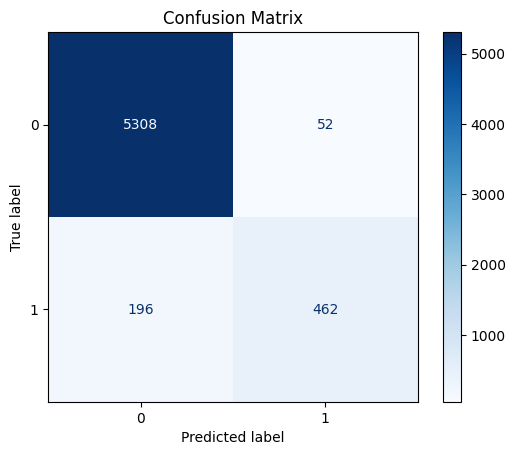


--- ROC Curve ---


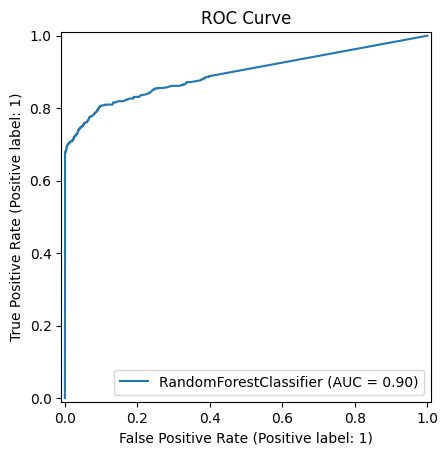

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, matthews_corrcoef, roc_auc_score,
    recall_score, precision_score, f1_score, cohen_kappa_score, confusion_matrix,
    ConfusionMatrixDisplay, RocCurveDisplay
)
import matplotlib.pyplot as plt

# --- 5. Train Random Forest Model ---
print("\n--- Model Training (Random Forest) ---")
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

# --- 6. Predictions ---
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # For ROC AUC

# --- 7. Evaluation ---
print("\n--- Model Evaluation ---")
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
sensitivity = recall  # Sensitivity is same as recall for binary classification

print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Matthews CorrCoef (MCC): {mcc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Recall / Sensitivity: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen’s Kappa: {kappa:.4f}")

# --- 8. Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# --- 9. ROC Curve ---
print("\n--- ROC Curve ---")
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve")
plt.show()

In [121]:
# Define the base model
base_rf = RandomForestClassifier(
    random_state=RANDOM_STATE,
    class_weight='balanced', # Keep this fixed
    n_jobs=-1
)

In [122]:
# Define the parameter GRID to search
# WARNING: Grid search tests ALL combinations. Keep the lists reasonably small!
# Example grid (adjust based on computational resources and desired thoroughness):
param_grid = {
    'n_estimators': [100, 200,300],       # Specific values to test
    'max_depth': [10, 20],                 # Specific values to test
    # 'min_samples_split': [2, 5, 10],       # Specific values to test
    # 'min_samples_leaf': [1, 3, 5],         # Specific values to test
    'max_features': ['sqrt', 'log2'],      # Specific values to test
    'bootstrap': [True]
}

# Calculate the number of combinations
import itertools
combinations = list(itertools.product(*param_grid.values()))
num_combinations = len(combinations)
print(f"Grid Search will test {num_combinations} parameter combinations.")

Grid Search will test 12 parameter combinations.


In [123]:
# Configure GridSearchCV
CV_FOLDS = 10       # Number of cross-validation folds
SCORING_METRIC = 'roc_auc' # Metric to optimize for

# Instantiate GridSearchCV - Note: No n_iter parameter
grid_search = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,    # Use param_grid instead of param_distributions
    cv=CV_FOLDS,
    scoring=SCORING_METRIC,
    verbose=1,              # Set to 1 or 2 to see progress
    n_jobs=-1               # Use all available cores for CV fits
)

# Perform the grid search on the TRAINING data
total_fits = num_combinations * CV_FOLDS
print(f"Starting Grid Search ({num_combinations} combinations x {CV_FOLDS} folds = {total_fits} fits)...")
print(f"This may take some time depending on the grid size and data...")

grid_search.fit(X_train, y_train)

print("Grid Search Complete.")
print(f"Best Score ({SCORING_METRIC}) found: {grid_search.best_score_:.4f}")
print("Best Parameters found:")
print(grid_search.best_params_)

# Get the best estimator found by the search
best_rf_model = grid_search.best_estimator_

Starting Grid Search (12 combinations x 10 folds = 120 fits)...
This may take some time depending on the grid size and data...
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Grid Search Complete.
Best Score (roc_auc) found: 0.9229
Best Parameters found:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [124]:
# --- 6. Prediction using the BEST model ---
print("\n--- Making Predictions using the Tuned Model ---")
# Use the best_estimator_ found by GridSearchCV
y_pred_tuned = best_rf_model.predict(X_test)
y_pred_proba_tuned = best_rf_model.predict_proba(X_test)[:, 1]


--- Making Predictions using the Tuned Model ---



--- Tuned Model Evaluation (on Test Set) ---
Accuracy: 0.9337

Balanced Accuracy: 0.8555

Matthews Correlation Coefficient (MCC): 0.6775

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5360
           1       0.68      0.76      0.71       658

    accuracy                           0.93      6018
   macro avg       0.82      0.86      0.84      6018
weighted avg       0.94      0.93      0.94      6018

ROC AUC Score (Tuned Model): 0.9304

Average Precision (AP / AUC PRC) (Tuned Model): 0.8259

Confusion Matrix (Tuned Model):
[[5122  238]
 [ 161  497]]


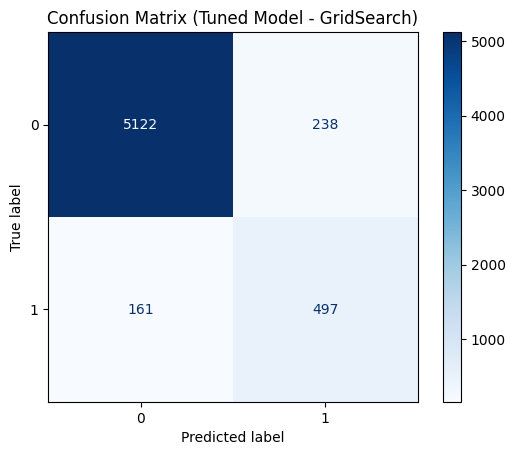


--- ROC Curve (Tuned Model) ---


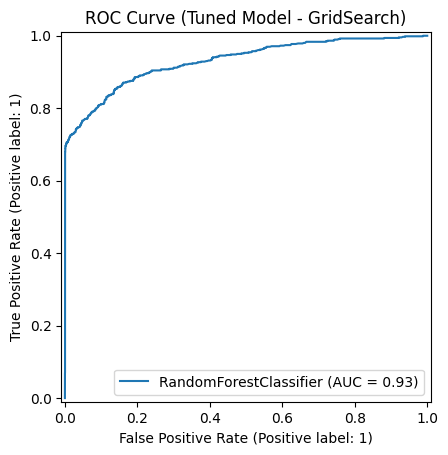

In [125]:
# --- 7. Evaluation of the TUNED Model ---
# Evaluate the *best model* on the held-out *test set*
print("\n--- Tuned Model Evaluation (on Test Set) ---")

# (Evaluation metrics code remains the same as in the RandomizedSearch version)
# 7.1. Standard Metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {accuracy_tuned:.4f}\n")
# 7.2. Balanced Accuracy
balanced_acc_tuned = balanced_accuracy_score(y_test, y_pred_tuned)
print(f"Balanced Accuracy: {balanced_acc_tuned:.4f}\n")
# 7.3. Matthews Correlation Coefficient (MCC)
mcc_tuned = matthews_corrcoef(y_test, y_pred_tuned)
print(f"Matthews Correlation Coefficient (MCC): {mcc_tuned:.4f}\n")
# 7.4. Classification Report
print("Classification Report (Tuned Model):")
try:
    class_names = [str(c) for c in le.classes_]
except NameError:
    class_names = [str(c) for c in sorted(y_test.unique())]
print(classification_report(y_test, y_pred_tuned, target_names=class_names))
# 7.5. ROC AUC Score
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"ROC AUC Score (Tuned Model): {roc_auc_tuned:.4f}\n")
# 7.6. Average Precision (Area under the Precision-Recall Curve)
average_precision_tuned = average_precision_score(y_test, y_pred_proba_tuned)
print(f"Average Precision (AP / AUC PRC) (Tuned Model): {average_precision_tuned:.4f}\n")
# 7.7. Confusion Matrix
print("Confusion Matrix (Tuned Model):")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cm_tuned)
try:
    disp_cm_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=class_names)
    disp_cm_tuned.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (Tuned Model - GridSearch)") # Updated Title
    plt.show()
except NameError:
    print("\nSkipping Tuned Confusion Matrix plot (could not determine class names).")
# 7.8. Precision-Recall Curve
print("\n--- ROC Curve (Tuned Model) ---")
try:
    # Use the best_rf_model which is the tuned model from GridSearchCV
    RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)
    plt.title("ROC Curve (Tuned Model - GridSearch)") # Updated Title
    plt.show()
except Exception as e:
    print(f"\nCould not plot Tuned ROC Curve: {e}")

#**CROSS VALIDATION**

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, matthews_corrcoef, roc_auc_score,
    recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.model_selection import StratifiedKFold
import numpy as np

# --- Stratified K-Fold Cross Validation ---
print("\n--- 10-Fold Stratified Cross-Validation ---")
skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state=RANDOM_STATE)

# Metrics storage
metrics = {
    'accuracy': [], 'balanced_accuracy': [], 'mcc': [], 'roc_auc': [],
    'recall': [], 'precision': [], 'f1': [], 'kappa': []
}

fold = 1
for train_idx, test_idx in skf.split(X, y):
    print(f"\nFold {fold}:")

    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    model = RandomForestClassifier(random_state=RANDOM_STATE, bootstrap =  True, max_depth = 10,
                                   max_features = 'sqrt', n_estimators = 100)
    model.fit(X_train_fold, y_train_fold)

    y_pred = model.predict(X_test_fold)
    y_proba = model.predict_proba(X_test_fold)[:, 1]

    # Collect metrics
    metrics['accuracy'].append(accuracy_score(y_test_fold, y_pred))
    metrics['balanced_accuracy'].append(balanced_accuracy_score(y_test_fold, y_pred))
    metrics['mcc'].append(matthews_corrcoef(y_test_fold, y_pred))
    metrics['roc_auc'].append(roc_auc_score(y_test_fold, y_proba))
    metrics['recall'].append(recall_score(y_test_fold, y_pred))
    metrics['precision'].append(precision_score(y_test_fold, y_pred))
    metrics['f1'].append(f1_score(y_test_fold, y_pred))
    metrics['kappa'].append(cohen_kappa_score(y_test_fold, y_pred))

    fold += 1

# --- Print Averaged Results ---
print("\n--- Cross-Validation Results (Mean ± Std) ---")
for metric_name, values in metrics.items():
    mean_val = np.mean(values)
    std_val = np.std(values)
    print(f"{metric_name.title()}: {mean_val:.4f} ± {std_val:.4f}")


--- 10-Fold Stratified Cross-Validation ---

Fold 1:

Fold 2:

Fold 3:

Fold 4:

Fold 5:

Fold 6:

Fold 7:

Fold 8:

Fold 9:

Fold 10:

--- Cross-Validation Results (Mean ± Std) ---
Accuracy: 0.9633 ± 0.0024
Balanced_Accuracy: 0.8400 ± 0.0120
Mcc: 0.7982 ± 0.0147
Roc_Auc: 0.9317 ± 0.0094
Recall: 0.6822 ± 0.0244
Precision: 0.9749 ± 0.0124
F1: 0.8023 ± 0.0159
Kappa: 0.7828 ± 0.0171



--- Feature Importances ---

Top 10 Features by Importance:
Ventolin12months                       0.490023
PreviousMedicalDiagnosisofAllergies    0.120548
Ageinyears                             0.103637
Allergic                               0.072674
Sneezing                               0.051978
Runny                                  0.040378
BlockedNose                            0.036949
NewAgeGrp_6 - 17                       0.032088
Gender                                 0.011028
BMIGrp_Underweight                     0.010467
dtype: float64


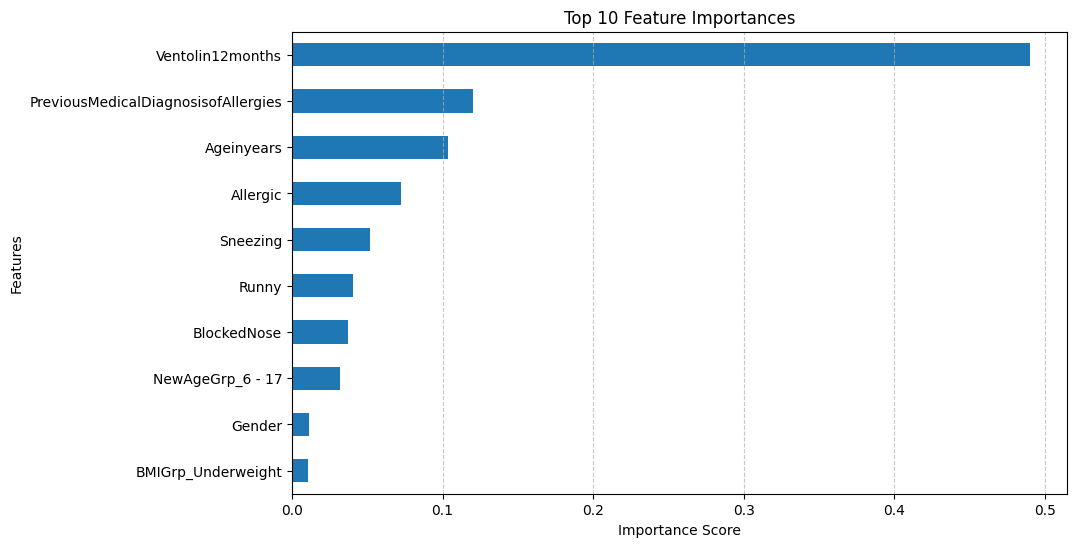

In [127]:
# Visualize Feature Importances
print("\n--- Feature Importances ---")
# Get feature importances from the best model found by GridSearchCV
importances = best_rf_model.feature_importances_

# Create a Series for easier manipulation
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort features by importance and get the top N
top_n = 10
top_features = feature_importances.sort_values(ascending=False).head(top_n)

print(f"\nTop {top_n} Features by Importance:")
print(top_features)

# Plotting the top N feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis() # Invert axis to have the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save the figure
plt.savefig(f'top_{top_n}_feature_importances.png', bbox_inches='tight')

plt.show()